# 1. Relative Strength Index (RSI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("datasets/eurusd.csv", parse_dates=["Date"], index_col="Date")
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


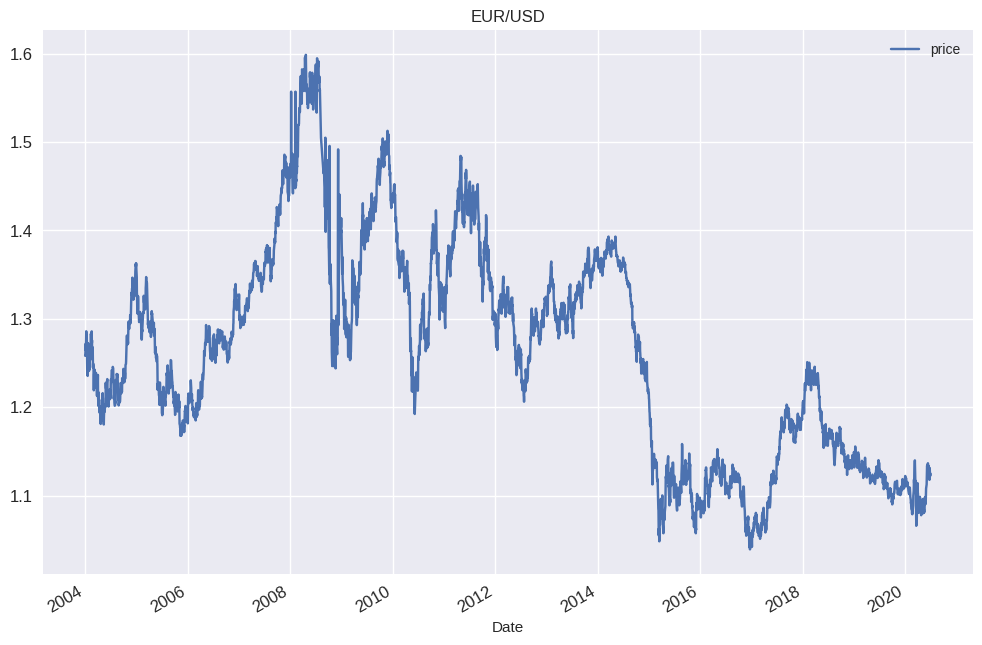

In [4]:
data.plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.show()

## 1-1. Relative Strength Index (RSI) with pandas

In [5]:
data.price.diff()

Date
2004-01-01         NaN
2004-01-02    0.000000
2004-01-05    0.010504
2004-01-06    0.003405
2004-01-07   -0.008008
                ...   
2020-06-24    0.003267
2020-06-25   -0.006147
2020-06-26   -0.002879
2020-06-29    0.000378
2020-06-30    0.002134
Name: price, Length: 4275, dtype: float64

In [6]:
data["U"] = np.where(data.price.diff() > 0, data.price.diff(), 0)
data["D"] = np.where(data.price.diff() < 0, -data.price.diff(), 0)
data

,price,U,D
Date,,,
2004-01-01,1.258194,0.000000,0.000000
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.010504,0.000000
2004-01-06,1.272103,0.003405,0.000000
2004-01-07,1.264095,0.000000,0.008008
...,...,...,...
2020-06-24,1.131235,0.003267,0.000000
2020-06-25,1.125087,0.000000,0.006147
2020-06-26,1.122208,0.000000,0.002879


In [7]:
periods = 20

data["MA_U"] = data.U.rolling(periods).mean()
data["MA_D"] = data.D.rolling(periods).mean()
data

,price,U,D,MA_U,MA_D
Date,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981


In [8]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100
data

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


In [9]:
data.dropna(inplace=True)
data

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


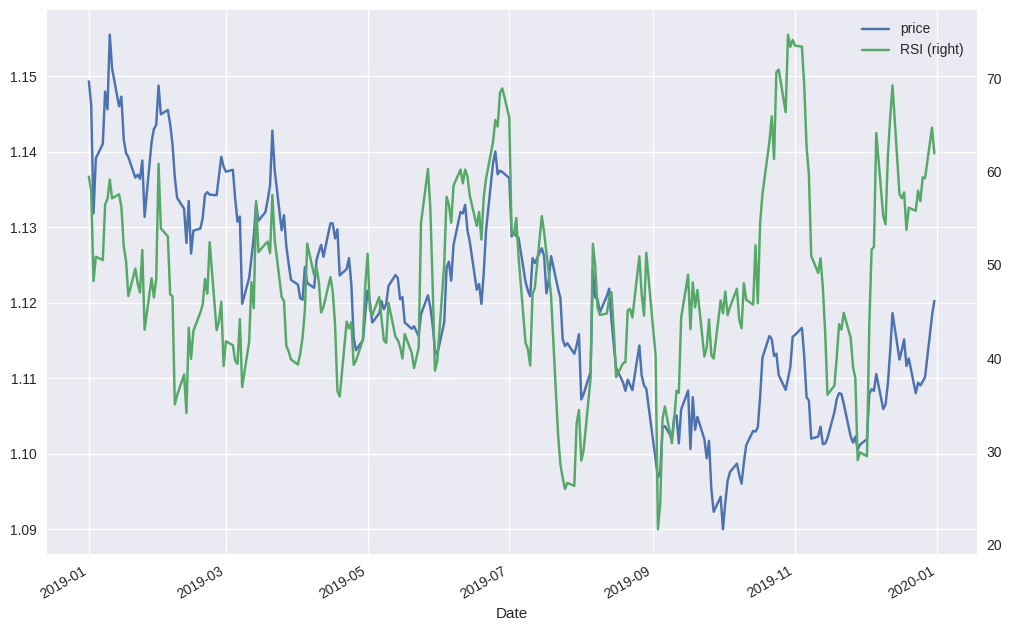

In [10]:
data.loc["2019", ["price", "RSI"]].plot(figsize=(12, 8), secondary_y="RSI")
plt.show()

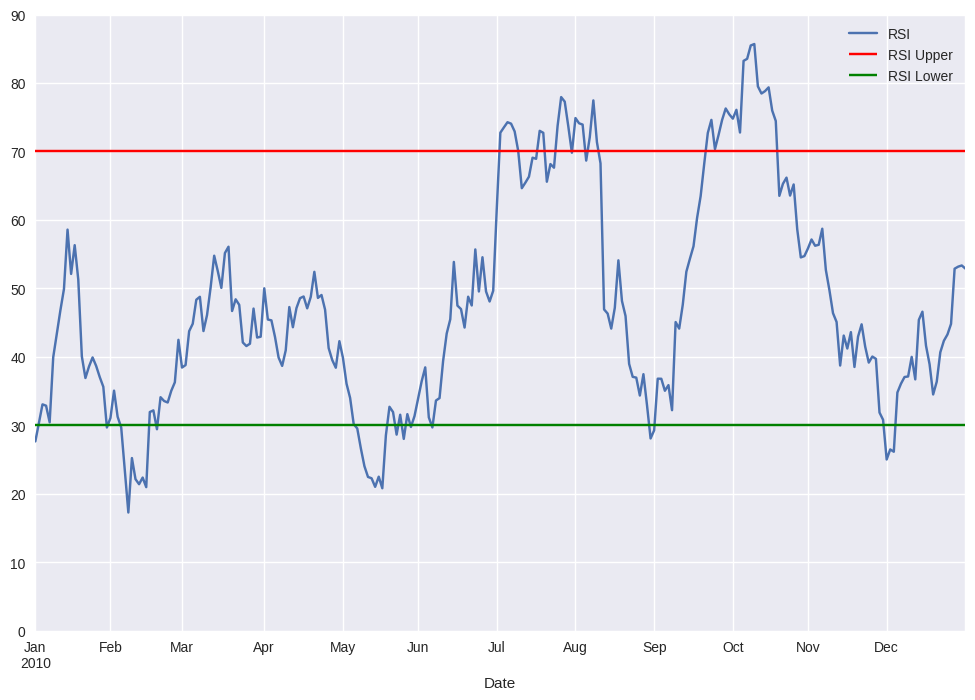

In [11]:
rsi_upper = 70
rsi_lower = 30

data.loc["2010", ["RSI"]].plot(figsize=(12, 8))
plt.hlines(y=rsi_upper, xmin=data.index[0], xmax=data.index[-1], label="RSI Upper", color = "r")
plt.hlines(y=rsi_lower, xmin=data.index[0], xmax=data.index[-1], label="RSI Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()

In [12]:
# If overbought then go short
data["position"] = np.where(data.RSI > rsi_upper, -1, np.nan)

# If oversold then go long
data["position"] = np.where(data.RSI < rsi_lower, 1, data.position)

# Neither overbought nor oversold then neutral
data.position = data.position.fillna(0)
data

,price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0


In [13]:
data.position.value_counts()

position
 0.0    3637
-1.0     316
 1.0     303
Name: count, dtype: int64

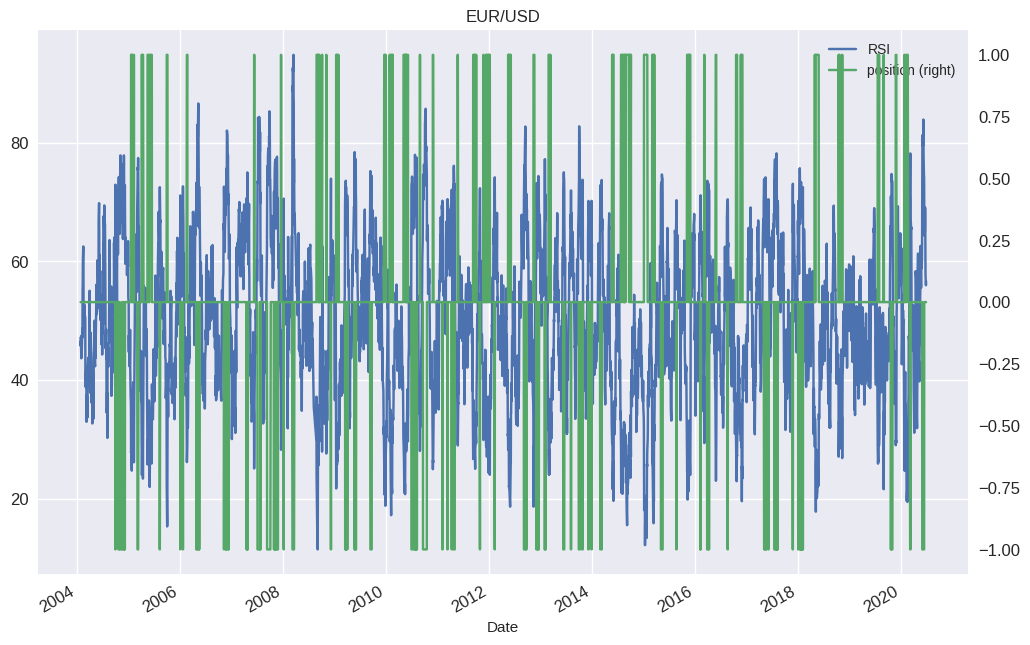

In [14]:
data.loc[:, ["RSI", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position", title="EUR/USD")
plt.show()

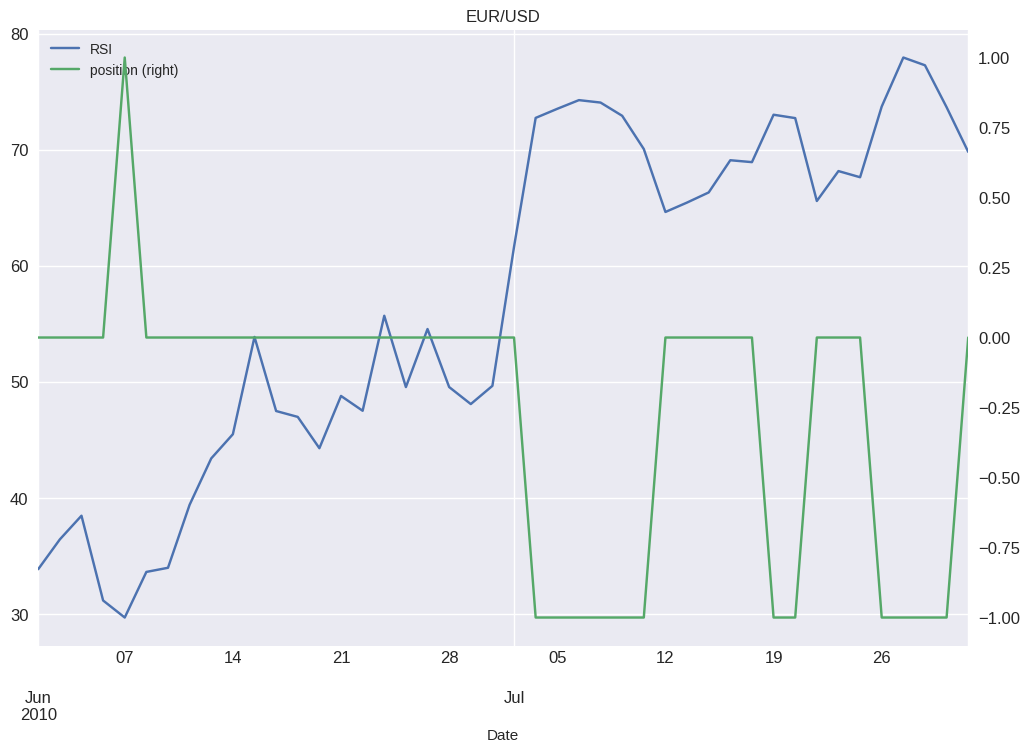

In [15]:
data.loc["06-2010":"07-2010", ["RSI", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position", title="EUR/USD")
plt.show()

In [16]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))
data.dropna(inplace=True)
data

,price,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562


In [17]:
data["strategy"] = data.position.shift(1) * data["returns"]
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572,NaN
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0


In [18]:
data.dropna(inplace=True)
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0


In [19]:
data["trades"] = data.position.diff().fillna(0).abs()
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades
Date,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0


In [20]:
data.trades.value_counts()

trades
0.0    3926
1.0     328
Name: count, dtype: int64

In [21]:
ptc = 0.00007
data["strategy_net"] = data.strategy - data.trades * ptc
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net
Date,,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0


In [22]:
data["cum_returns"] = data["returns"].cumsum().apply(np.exp)
data["cum_strategy"] = data["strategy"].cumsum().apply(np.exp)
data["cum_strategy_net"] = data["strategy_net"].cumsum().apply(np.exp)
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net,cum_returns,cum_strategy,cum_strategy_net
Date,,,,,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0,1.004676,1.000000,1.000000
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0,1.001852,1.000000,1.000000
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0,1.010066,1.000000,1.000000
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0,1.010471,1.000000,1.000000
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0,1.013050,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0,0.911549,1.562978,1.527501
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0,0.906595,1.562978,1.527501
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0,0.904276,1.562978,1.527501


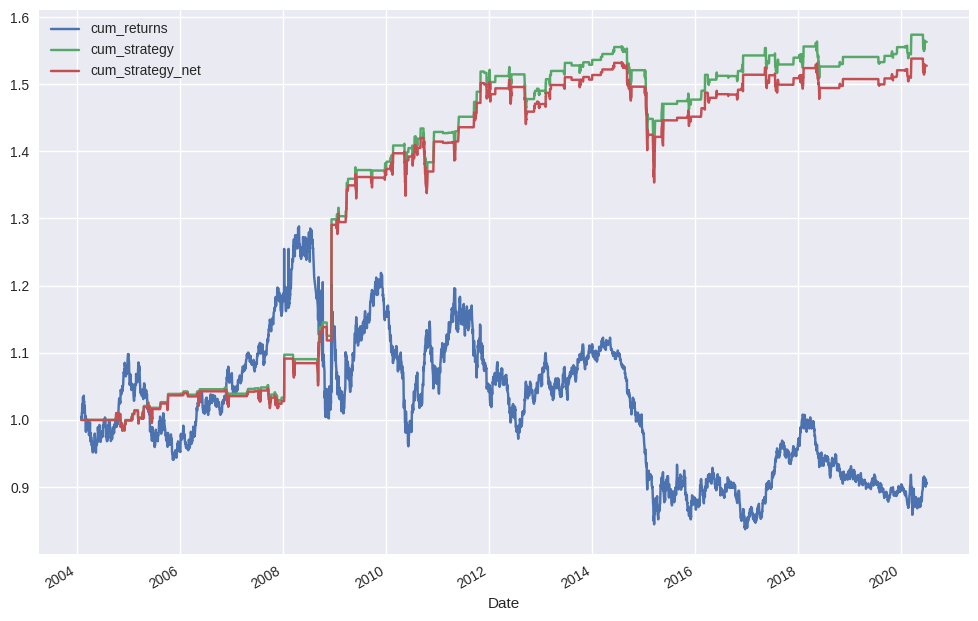

In [23]:
data[["cum_returns", "cum_strategy", "cum_strategy_net"]].plot(figsize=(12 , 8))
plt.show()

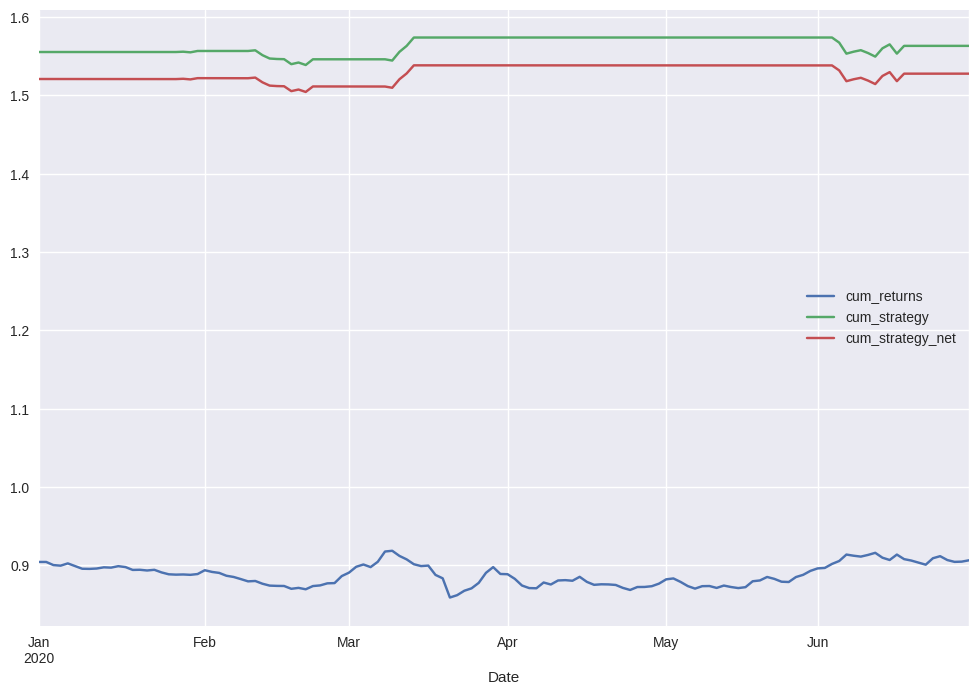

In [24]:
data.loc["2020", ["cum_returns", "cum_strategy", "cum_strategy_net"]].plot(figsize=(12, 8))
plt.show()